<a href="https://colab.research.google.com/github/mariam-asaad/SE-Repo/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nagham Khaled ID: 49-0888, Tutorial:T-06

---

Name: Mariam Asaad, ID:49-0356, Tutorial:T-06

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
#importing all the libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
# getting an overview about the dataset
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
# getting an overview about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
# checking the unique values in year, for duplicates and inconsistencies
df['year'].unique()

array([2013, 2014, 2012, 2002, 2007, 2008, 2011, 2015, 2010, 2005, 2006,
       2009, 2004, 1998, 2001, 2003, 1996, 1997, 2000, 1999, 1995, 1991,
       1990, 1994, 1993, 1992])

In [ ]:
# checking the unique values in make, for duplicates and inconsistencies
df['make'].unique()

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [ ]:
# checking the unique values in model, for duplicates and inconsistencies
df['model'].unique()

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

In [ ]:
# checking the unique values in trim, for duplicates and inconsistencies
df['trim'].unique()

array(['GLS', 'SR5', 'Base', ..., 'Base PZEV', 'Natural Gas',
       '10th Anniversary'], dtype=object)

In [ ]:
# checking the unique values in body, for duplicates and inconsistencies
df['body'].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [ ]:
# checking the unique values in vin, for duplicates and inconsistencies
df['vin'].unique()

array(['5npeb4acxdh702805', 'jtezu5jr2e5064567', 'jthbf5c24c5168599', ...,
       'wba3a5c56df356614', '4t1bf1fk8du254684', 'knadm4a32d6164825'],
      dtype=object)

In [ ]:
# checking the unique values in state, for duplicates and inconsistencies
df['state'].unique()

array(['ma', 'fl', 'wa', 'co', 'ca', 'il', 'nv', 'mo', 'tx', 'ne', 'md',
       'nj', 'la', 'ny', 'nc', 'ut', 'va', 'ga', 'tn', 'oh', 'ms', 'pa',
       'or', 'mi', 'wi', 'az', 'pr', 'mn', 'in', 'hi', 'sc', 'ok', 'nm',
       'al'], dtype=object)

In [ ]:
# checking the unique values in condition, for duplicates and inconsistencies
df['condition'].unique()

array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
# checking the unique values in odometer, for duplicates and inconsistencies
df['odometer'].unique()

array(['50404.0mi', '17846.0mi', '21122.0mi', ..., '45357.0mi',
       '43376.0mi', '49953.0mi'], dtype=object)

In [ ]:
# checking the unique values in color, for duplicates and inconsistencies
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [ ]:
# checking the number of unkown values in color
df['color'].value_counts()

black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
—            2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
Name: color, dtype: int64

In [ ]:
# checking the unique values in seller, for duplicates and inconsistencies
df['seller'].unique()

array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

In [ ]:
# checking the unique values in transmission, for duplicates and inconsistencies
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [ ]:
# checking the unique values in interior, for duplicates and inconsistencies
df['interior'].unique()

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
# checking the number of unknown values in interior
df['interior'].value_counts()

black        20734
gray         15020
beige         4917
tan           3777
—              988
brown          694
blue           101
red             92
silver          88
off-white       39
purple          31
gold            26
white           23
burgundy        20
green           16
orange          11
yellow           1
Name: interior, dtype: int64

In [ ]:
# checking the unique values in mmr, for duplicates and inconsistencies
df['mmr'].unique()

array(['$11000', '$28700', '$22200', ..., '$51500', '$57900', '$94000'],
      dtype=object)

In [ ]:
# checking the unique values in sellingprice, for duplicates and inconsistencies
df['sellingprice'].unique()

array(['$10900', '$29900', '$24200', '$3200', '$22100', '$15500',
       '$13600', '$14700', '$20000', '$27500', '$22250', '$23700',
       '$12000', '$3700', '$5500', '$7300', '$800', '$18000', '$12500',
       '$8900', '$36500', '$5900', '$16300', '$17800', '$8300', '$3000',
       '$700', '$5100', '$23000', '$9100', '$40250', '$17900', '$51000',
       '$20600', '$12900', '$9200', '$19600', '$18900', '$25000', '$8600',
       '$20900', '$28750', '$31700', '$11900', '$1250', '$6700', '$8200',
       '$2800', '$27000', '$21300', '$9500', '$13200', '$11400', '$8700',
       '$11200', '$13700', '$17000', '$22300', '$5200', '$3400', '$19800',
       '$1100', '$19000', '$7500', '$2100', '$19300', '$12800', '$8000',
       '$11600', '$13900', '$9000', '$8400', '$4800', '$15700', '$15000',
       '$14400', '$20400', '$14600', '$34000', '$13750', '$8500',
       '$10300', '$10600', '$10000', '$1300', '$30000', '$6200', '$25500',
       '$12100', '$11000', '$22800', '$44250', '$7100', '$12600

In [ ]:
# checking the unique values in saledate, for duplicates and inconsistencies
df['saledate'].unique()

array(['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)',
       'Wed Feb 18 2015 07:15:00 GMT-0800 (PST)',
       'Tue Jan 20 2015 01:30:00 GMT-0800 (PST)', ...,
       'Wed Mar 04 2015 01:45:00 GMT-0800 (PST)',
       'Wed Jun 17 2015 02:45:00 GMT-0700 (PDT)',
       'Tue Apr 28 2015 04:30:00 GMT-0700 (PDT)'], dtype=object)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# removing the $ sign from selling price and mmr and changing their datatypes to int
df['sellingprice'] = df['sellingprice'].str.extract('([\d]+)',expand=False).astype(int)
df['mmr'] = df['mmr'].str.extract('([\d]+)',expand=False).astype(int)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# removing the 'mi' from odometer and changing their datatypes to float
df['odometer'] = df['odometer'].str.extract('([\d]+)',expand=False).astype(float)

In [ ]:
# renaming the columns to reflect the units in the column name
df.rename(columns={'odometer': 'odometer/mi'}, inplace=True)
df.rename(columns={'mmr': 'mmr/$'}, inplace=True)
df.rename(columns={'sellingprice': 'sellingprice/$'}, inplace=True)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer/mi,color,interior,seller,mmr/$,sellingprice/$,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# checking the datatypes and names were correctly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            46578 non-null  int64  
 1   make            46578 non-null  object 
 2   model           46578 non-null  object 
 3   trim            46578 non-null  object 
 4   body            46578 non-null  object 
 5   transmission    46578 non-null  object 
 6   vin             46578 non-null  object 
 7   state           46578 non-null  object 
 8   condition       46578 non-null  float64
 9   odometer/mi     46578 non-null  float64
 10  color           46578 non-null  object 
 11  interior        46578 non-null  object 
 12  seller          46578 non-null  object 
 13  mmr/$           46578 non-null  int64  
 14  sellingprice/$  46578 non-null  int64  
 15  saledate        46578 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.7+ MB


In [ ]:
# renaming all sedan body values
df = df.replace(['sedan'], 'Sedan')
df = df.replace(['G Sedan'], 'Sedan')
df = df.replace(['g Sedan'], 'Sedan')
df = df.replace(['g sedan'], 'Sedan')

In [ ]:
# renaming all coupe body values
df = df.replace(['coupe'], 'Coupe')
df = df.replace(['G Coupe'], 'Coupe')
df = df.replace(['g coupe'], 'Coupe')
df = df.replace(['Genesis Coupe'], 'Coupe')
df = df.replace(['genesis coupe'], 'Coupe')
df = df.replace(['Koup'], 'Coupe')
df = df.replace(['Elantra Coupe'], 'Coupe')
df = df.replace(['CTS-V Coupe'], 'Coupe')
df = df.replace(['CTS Coupe'], 'Coupe')
df = df.replace(['cts coupe'], 'Coupe')
df = df.replace(['Q60 Coupe'], 'Coupe')

In [ ]:
# renaming all convertible body values
df = df.replace(['convertible'], 'Convertible')
df = df.replace(['G Convertible'], 'Convertible')
df = df.replace(['Beetle Convertible'], 'Convertible')
df = df.replace(['G37 Convertible'], 'Convertible')
df = df.replace(['Q60 Convertible'], 'Convertible')
df = df.replace(['GranTurismo Convertible'], 'Convertible')
df = df.replace(['beetle convertible'], 'Convertible')
df = df.replace(['g convertible'], 'Convertible')
df = df.replace(['granturismo convertible'], 'Convertible')

In [ ]:
# renaming all hatchback body values
df = df.replace(['hatchback'], 'Hatchback')

In [ ]:
# renaming all suv body values
df = df.replace(['suv'], 'SUV')

In [ ]:
# renaming all minivan body values
df = df.replace(['van'], 'Minivan')
df = df.replace(['Van'], 'Minivan')
df = df.replace(['minivan'], 'Minivan')
df = df.replace(['e-series van'], 'Minivan')
df = df.replace(['promaster cargo van'], 'Minivan')
df = df.replace(['Promaster Cargo Van'], 'Minivan')
df = df.replace(['Transit Van'], 'Minivan')
df = df.replace(['E-Series Van'], 'Minivan')

In [ ]:
# renaming all wagon body values
df = df.replace(['wagon'], 'Wagon')
df = df.replace(['CTS Wagon'], 'Wagon')
df = df.replace(['TSX Sport Wagon'], 'Wagon')
df = df.replace(['tsx sport wagon'], 'Wagon')

In [ ]:
# renaming all pickup truck body values
df = df.replace(['Crew Cab'], 'Pickup Truck')
df = df.replace(['Regular Cab'], 'Pickup Truck')
df = df.replace(['Double Cab'], 'Pickup Truck')
df = df.replace(['SuperCrew'], 'Pickup Truck')
df = df.replace(['Extended Cab'], 'Pickup Truck')
df = df.replace(['SuperCab'], 'Pickup Truck')
df = df.replace(['king cab'], 'Pickup Truck')
df = df.replace(['King Cab'], 'Pickup Truck')
df = df.replace(['extended cab'], 'Pickup Truck')
df = df.replace(['quad cab'], 'Pickup Truck')
df = df.replace(['supercab'], 'Pickup Truck')
df = df.replace(['Quad Cab'], 'Pickup Truck')
df = df.replace(['crew cab'], 'Pickup Truck')
df = df.replace(['supercrew'], 'Pickup Truck')
df = df.replace(['CrewMax Cab'], 'Pickup Truck')
df = df.replace(['double cab'], 'Pickup Truck')
df = df.replace(['Club Cab'], 'Pickup Truck')
df = df.replace(['Access Cab'], 'Pickup Truck')
df = df.replace(['Cab Plus 4'], 'Pickup Truck')
df = df.replace(['crewmax cab'], 'Pickup Truck')
df = df.replace(['access cab'], 'Pickup Truck')
df = df.replace(['Mega Cab'], 'Pickup Truck')
df = df.replace(['regular cab'], 'Pickup Truck')
df = df.replace(['mega cab'], 'Pickup Truck')
df = df.replace(['regular-cab'], 'Pickup Truck')
df = df.replace(['Xtracab'], 'Pickup Truck')
df = df.replace(['xtracab'], 'Pickup Truck')

In [ ]:
# checking that all categories have been replaced
df.body.unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
# replacing the '-' values with 'UNKNOWN'
df['interior'] = df['interior'].replace(['—'], 'UNKNOWN')
df['interior'].unique()

array(['gray', 'UNKNOWN', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
# replacing the '-' values with 'UNKNOWN'
df['color'] = df['color'].replace(['—'], 'UNKNOWN')
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'UNKNOWN', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

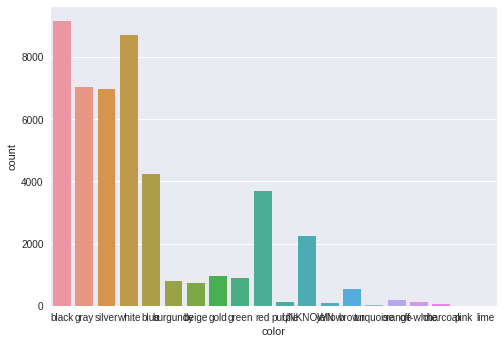

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

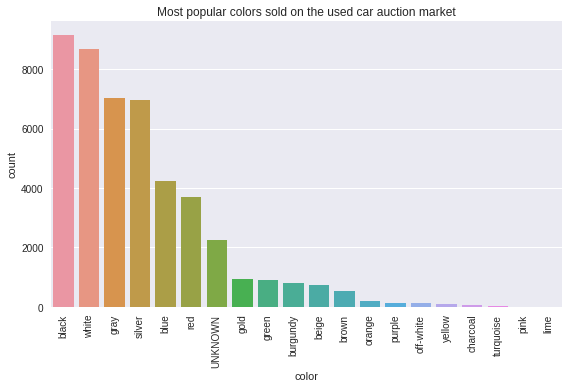

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

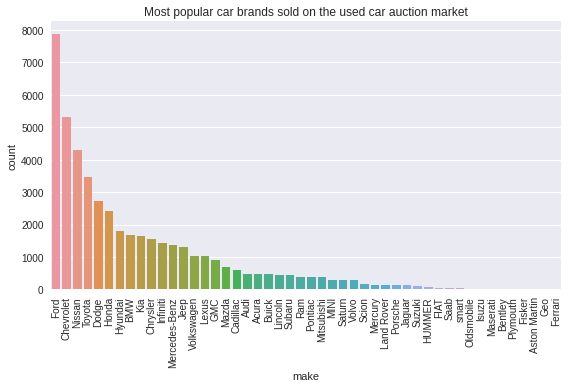

In [ ]:
# plotting a count plot for brands
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The 3 most popular car brands are Ford, Chevrolet and Nissan.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

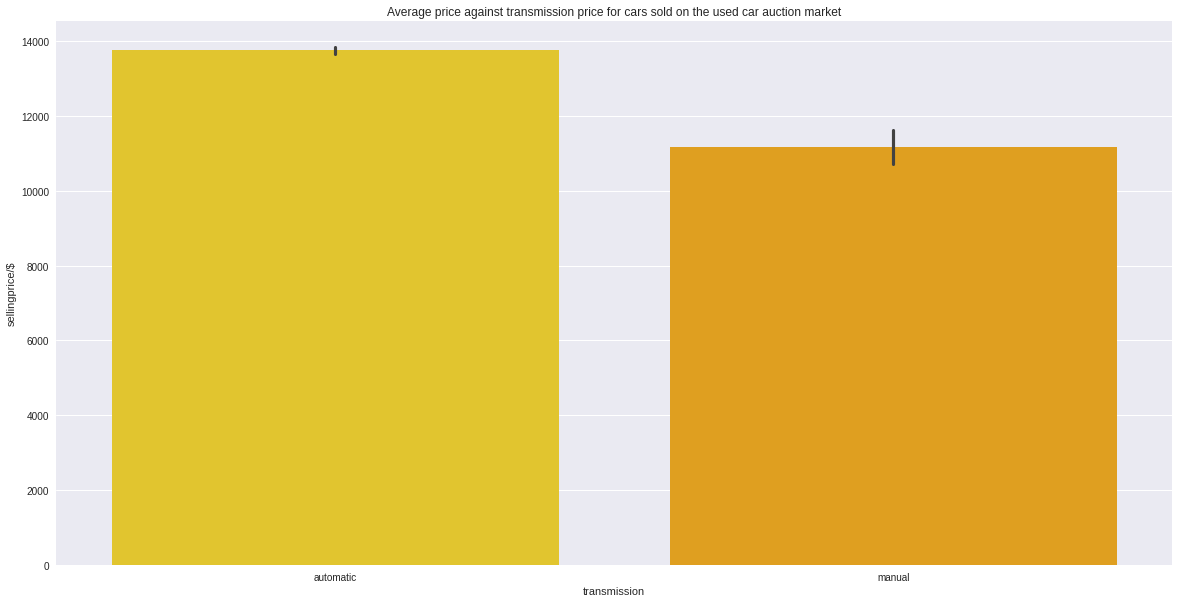

In [ ]:
# plotting a bar plot for transmission against price
plt.figure(figsize=(20,10))
sns.barplot(x='transmission', y='sellingprice/$', data=df, palette='Wistia').set(title='Average price against transmission price for cars sold on the used car auction market');

**Answer for Q2**: Yes, the average price for automatic transmission cars is higher than that for the manual transmission cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

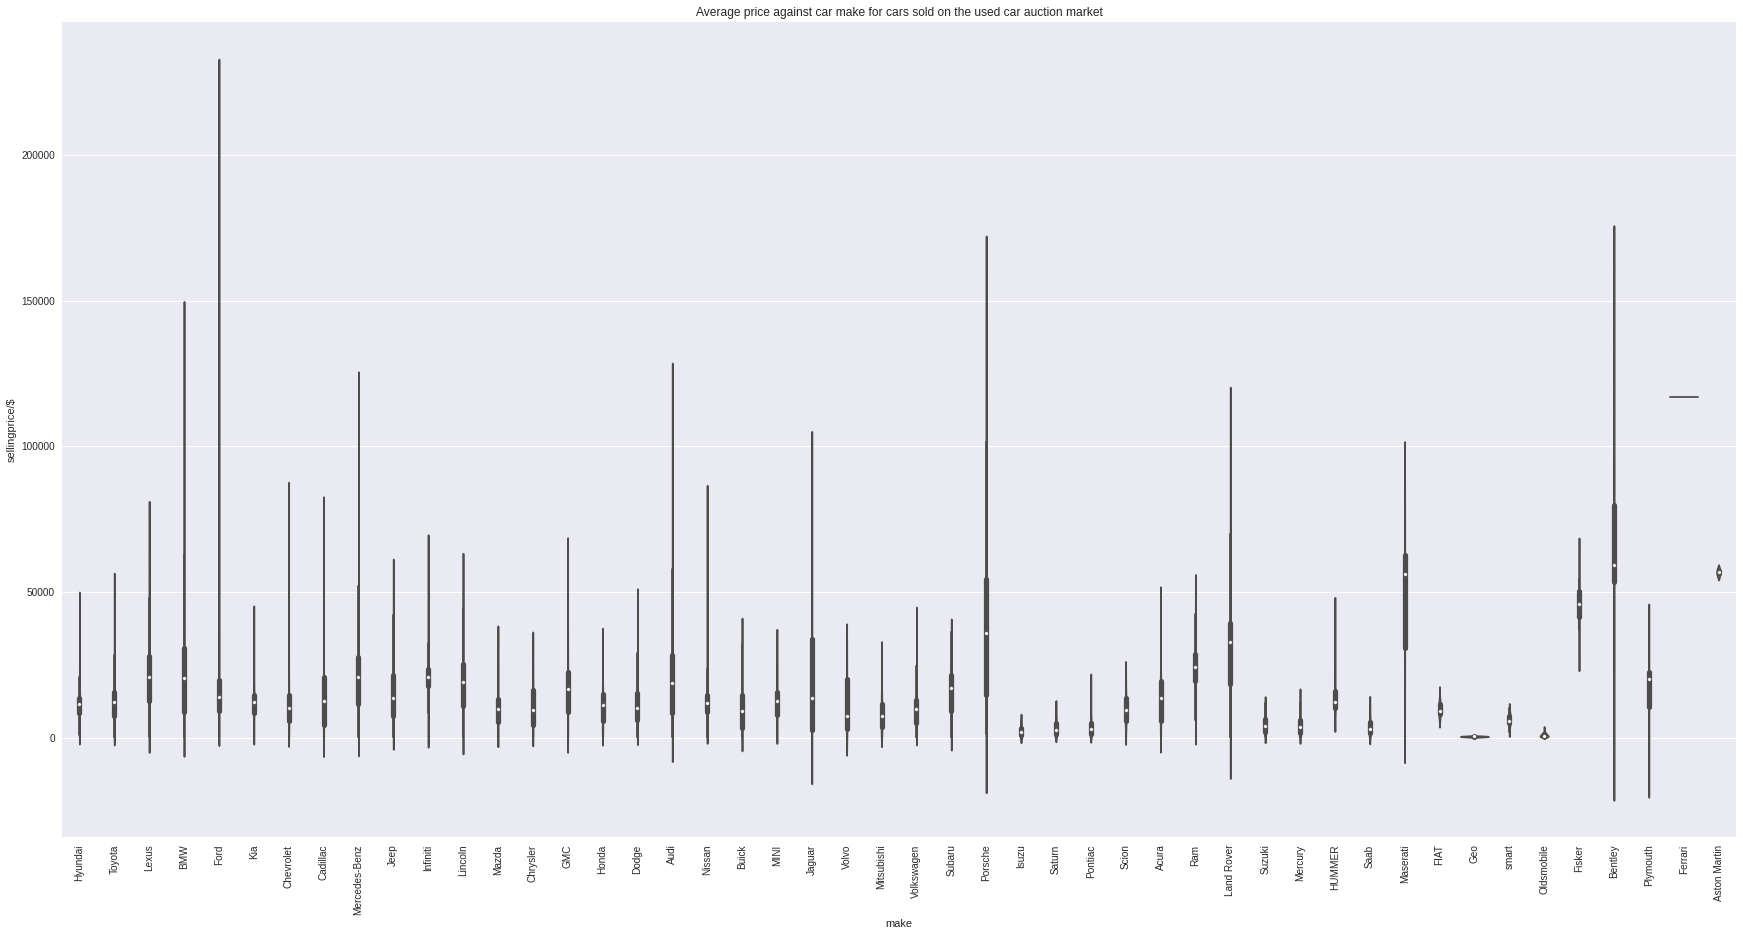

In [ ]:
# plotting a box plot for make against selling price
plt.figure(figsize=(30,15))
sns.violinplot(x='make', y='sellingprice/$', data=df, palette='Wistia').set(title='Average price against car make for cars sold on the used car auction market');
plt.xticks(rotation = 90);

**Answer for Q3**: The brands that have the widest distribution are Ford and Bentley. The two brands that sell the most expensive cars are Ford and Bentley.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

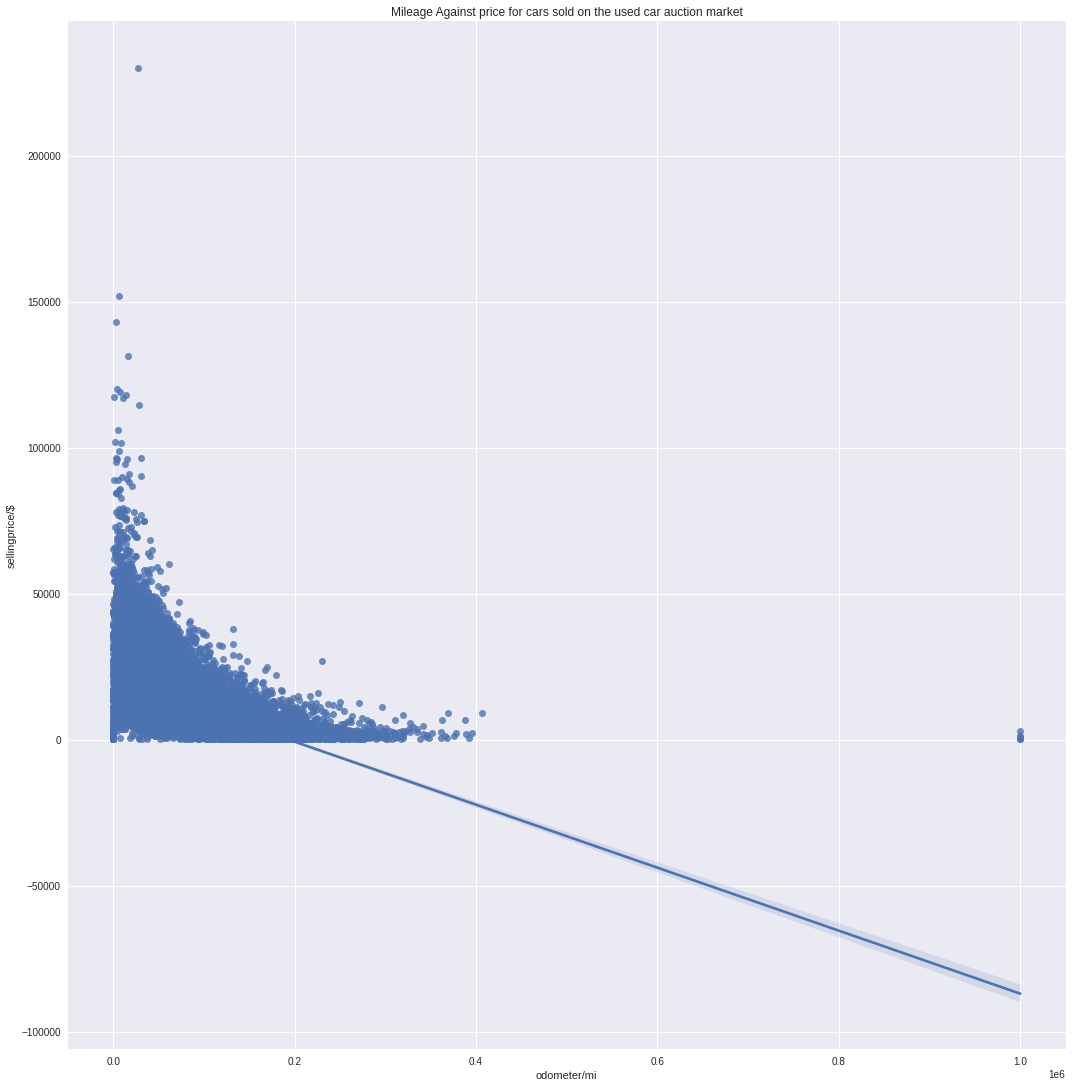

In [ ]:
# plotting a scatter plot with a line of best fit for mileage against selling price
sns.lmplot(x='odometer/mi', y='sellingprice/$', data=df, height = 15).set(title='Mileage Against price for cars sold on the used car auction market');

**Answer for Q4**: There is a medium to high negative correlation.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

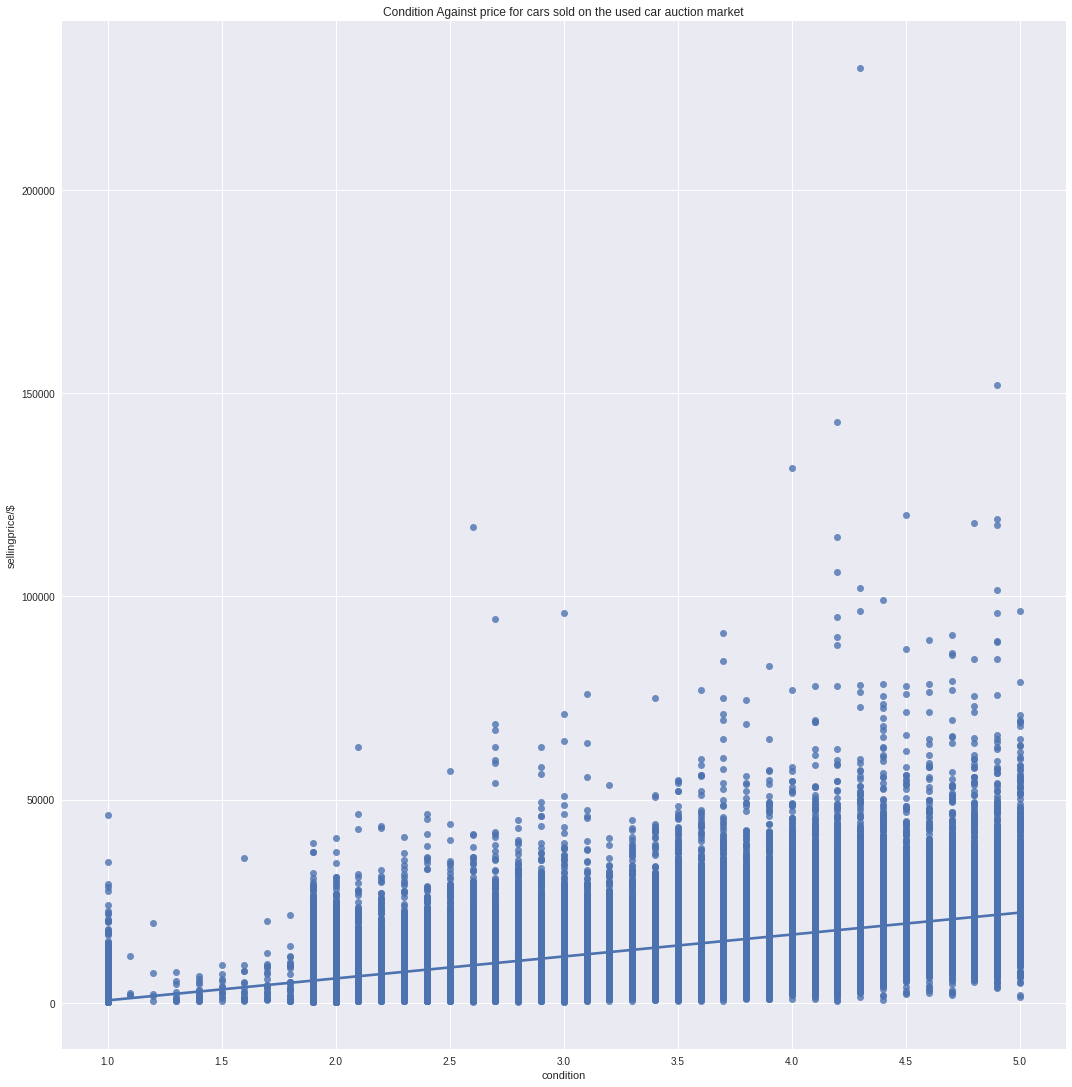

In [ ]:
# plotting a scatter plot with a line of best fit for condition against selling price
sns.lmplot(x='condition', y='sellingprice/$', data=df, height = 15).set(title='Condition Against price for cars sold on the used car auction market');

**Answer for Q5**: There is a medium to high positive correlation.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [ ]:
# preparing the order
large_to_small = df.groupby(["body"])['sellingprice/$'].aggregate(np.mean).reset_index().sort_values('sellingprice/$')
large_to_small

,body,sellingprice/$
7,Wagon,9872.678720
2,Hatchback,10320.636123
6,Sedan,11861.795912
3,Minivan,11981.053571
5,SUV,16221.941270
1,Coupe,16538.921097
0,Convertible,17581.563278
4,Pickup Truck,17981.766407


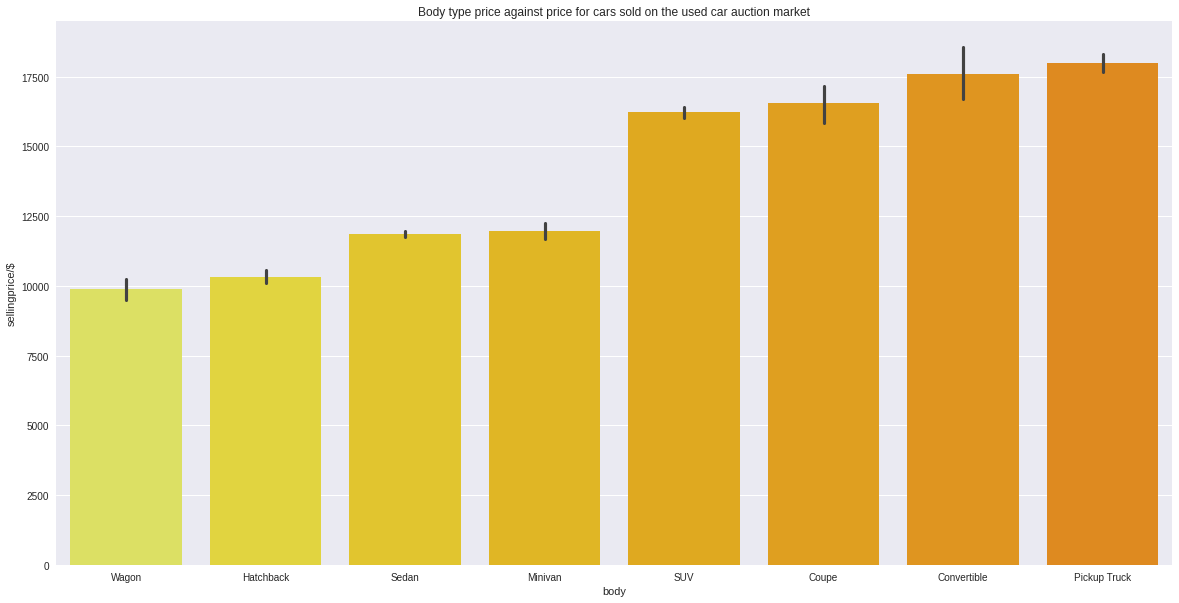

In [ ]:
# plotting a bar chart for body type against selling price
plt.figure(figsize=(20,10))
sns.barplot(x='body', y='sellingprice/$', data=df,order=large_to_small['body'], palette='Wistia').set(title='Body type price against price for cars sold on the used car auction market');

**Answer for Q6**: Yes, there are differences. If we do not take outliers into account, the least expensive on average is Wagon, while the most expensive on average is Pickup Truck.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
# label encoding make, body, transmission, color and interior to easily display the correlation coefficients, and checking if encoding has worked
from sklearn import preprocessing

temp_encode=df.copy()
label_encoder = preprocessing.LabelEncoder()

temp_encode['make']= label_encoder.fit_transform(temp_encode['make'])
temp_encode['body']= label_encoder.fit_transform(temp_encode['body'])
temp_encode['transmission']= label_encoder.fit_transform(temp_encode['transmission'])
temp_encode['color']= label_encoder.fit_transform(temp_encode['color'])
temp_encode['interior']= label_encoder.fit_transform(temp_encode['interior'])

temp_encode['color'].unique()

array([ 2,  8, 16, 18,  3,  5,  1,  7,  9, 15, 14,  0, 19,  4, 17, 12, 11,
        6, 13, 10])

In [ ]:
# checking variable correlation
temp_encode.corr()

,year,make,body,transmission,condition,odometer/mi,color,interior,mmr/$,sellingprice/$
year,1.000000,-0.006189,0.040194,-0.089053,0.549158,-0.777219,0.000426,-0.191070,0.592904,0.581164
make,-0.006189,1.000000,0.065166,0.045072,-0.014931,-0.030084,-0.008882,0.001877,-0.058722,-0.055571
body,0.040194,0.065166,1.000000,-0.147859,-0.021260,-0.001772,-0.025853,0.022084,-0.106182,-0.106170
transmission,-0.089053,0.045072,-0.147859,1.000000,-0.032498,0.033408,-0.011277,-0.031902,-0.045022,-0.049499
condition,0.549158,-0.014931,-0.021260,-0.032498,1.000000,-0.540371,0.013068,-0.105672,0.476200,0.529141
odometer/mi,-0.777219,-0.030084,-0.001772,0.033408,-0.540371,1.000000,0.026899,0.170697,-0.587920,-0.580900
color,0.000426,-0.008882,-0.025853,-0.011277,0.013068,0.026899,1.000000,0.030132,-0.043646,-0.038656
interior,-0.191070,0.001877,0.022084,-0.031902,-0.105672,0.170697,0.030132,1.000000,-0.140924,-0.137056
mmr/$,0.592904,-0.058722,-0.106182,-0.045022,0.476200,-0.587920,-0.043646,-0.140924,1.000000,0.979783
sellingprice/$,0.581164,-0.055571,-0.106170,-0.049499,0.529141,-0.580900,-0.038656,-0.137056,0.979783,1.000000


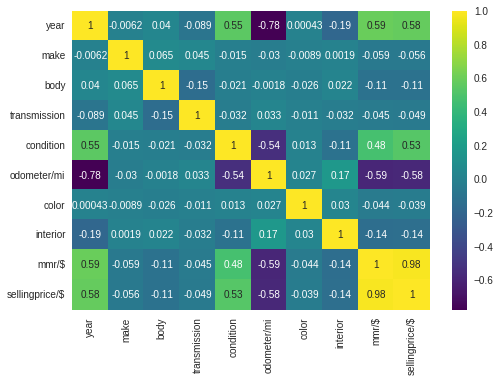

In [ ]:
# checking variable correlation through a heat map
sns.heatmap(temp_encode.corr(), cmap='viridis', annot = True);

We are dropping multiple columns for multiple reasons. The mmr column has a correlation with selling price that is too high, and that might lead to model over-fitting. The vin is the ID of the car, so it is not relevant to the model. Trim, saledate, seller and model have too many values to be able to see any viable correlation. State could have been a good attribute to have, but the meaning of the categories was not explained, so we cannot make any conclusions if we use them.

In [ ]:
# dropping said columns
temp_encode.drop('mmr/$', axis=1, inplace = True)
temp_encode.drop('vin', axis=1, inplace = True)
temp_encode.drop('trim', axis=1, inplace = True)
temp_encode.drop('saledate', axis=1, inplace = True)
temp_encode.drop('model', axis=1, inplace = True)
temp_encode.drop('seller', axis=1, inplace = True)
temp_encode.drop('state', axis=1, inplace = True)

In [ ]:
# checking that columns have been dropped
temp_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            46578 non-null  int64  
 1   make            46578 non-null  int64  
 2   body            46578 non-null  int64  
 3   transmission    46578 non-null  int64  
 4   condition       46578 non-null  float64
 5   odometer/mi     46578 non-null  float64
 6   color           46578 non-null  int64  
 7   interior        46578 non-null  int64  
 8   sellingprice/$  46578 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.2 MB


In [ ]:
#min max normalization to reduce wide ranges of variables, such as odometer.

numerical_columns = ['year', 'condition', 'odometer/mi', 'make', 'body', 'color', 'interior']


temp_encode[numerical_columns] = ( 
    
    temp_encode[numerical_columns] - temp_encode[numerical_columns].min()  
) /( 
    
    temp_encode[numerical_columns].max() - temp_encode[numerical_columns].min()
)


temp_encode.head()

,year,make,body,transmission,condition,odometer/mi,color,interior,sellingprice/$
0,0.92,0.382979,0.857143,0,0.725,0.050403,0.105263,0.4375,10900
1,0.96,0.936170,0.714286,0,0.975,0.017845,0.421053,0.0000,29900
2,0.88,0.531915,0.857143,0,0.775,0.021121,0.842105,0.1250,24200
3,0.48,0.063830,0.714286,0,0.225,0.145302,0.105263,0.1250,3200
4,0.96,0.276596,0.428571,0,0.975,0.006713,0.947368,0.4375,22100


## Train-Test Split

In [ ]:
#split into 80% train, and 20% test
from sklearn.model_selection import train_test_split

x = temp_encode.drop('sellingprice/$',axis=1)
y = temp_encode['sellingprice/$']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,3083.149488
1,theta_1,year,15240.068385
2,theta_2,make,-1715.999940
3,theta_3,body,-4750.694389
4,theta_4,transmission,-1288.049217
5,theta_5,condition,10320.089219
6,theta_6,odometer/mi,-46839.678488
7,theta_7,color,-1100.352674
8,theta_8,interior,-728.363388


With this information, we can represent the model using the multiple linear regression formula. Prediction is done by substituting the variables with their corresponding values.

$$\mathbf{Y_i = -3083.149488 + 15240.068385(year) - 1715.999940(make) - 4750.694389(body) - 1288.049217 (transmission) + 10320.089219 (condition) - 46839.678488 (odometer/mi) - 1100.352674 (color) - 728.363388 (interior)}$$

## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  7106.0732507440525
R^2 obtained is: 0.45344094856863526


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: $R^2$ is 0.45. It is not a particularly high R^2 value, but it would have to be compared with the industry standard to be able to evaluate whether this value is good or not. The RMSE is 7016. This number is a bit too high in this context, because $7000 in the price of one car is a big difference.

One of the problems of this dataset is the presence of outliers in multiple attributes. This can be particularly observed in the odometer vs selling price as well as the make vs selling price visualisations. These outliers need to be dealt with to provide a more accurate model.

Another problem with this dataset is that the values in specific columns are not sufficiently explained, such as state, and this leads to uselessness of the coefficient of these attributes because we cannot interpret them. A more detailed explanation of the values within the dataset needs to be provided.

No, we would not recommend this model until these issues mentioned above have been solved.